# Deliverable 2: Analysis of Brand Campaigns

Welcome to my analysis of brand campaigns. In this notebook, I dive deep into the data to understand how different brands interact with their campaign publishing activities. My analysis is centered around four key questions:

1. What is the ratio of brands that published campaigns vs. those that did not publish any campaign within each plan level?
2. How many brands continued to create campaigns after their first published one?
3. Which brands have the highest paying campaigns?
4. How long does it take for new brands to publish a campaign?

Here's what I'll be doing in this notebook:

- First, I'll load our two key datasets: 'campaigns data' and 'users data'. 
- I'll then process and merge these datasets to extract the necessary information for our analysis. This involves extracting the budget for each campaign, identifying which brands have published a campaign, and calculating the time it takes for a brand to publish their campaigns.
- I'll present the results of my analysis both numerically and visually, using tables and plots to clearly communicate my findings.

By the end of this analysis, we'll have a better understanding of the publishing behavior of brands, their financial investment in campaigns, and the typical timelines for campaign publishing. These insights could be instrumental in shaping user engagement strategies, providing targeted support, and optimizing resource allocation.

In [16]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [17]:
# Load the campaigns data
campaigns_data = pd.read_csv('sample_campaigns - data.csv')
campaigns_data.head()

,campaign_id,user_id,payment,updated,created,isUnpublished,isDeleted,isDraft,isApproved,isPublic,published
0,61269b87fd44e10d880dd983,61269342b9e1180d61686d9a,"{'cash': {'available': True, 'budget': 5000, '...",2021-08-25 19:38:00,2021-08-25 19:35:35,False,False,True,False,False,NaN
1,60c810edba9bff0d35f14179,60c80e784857720d47bba912,"{'cash': {'available': True, 'budget': 2000, '...",2021-06-15 2:53:04,2021-06-15 2:31:10,False,False,True,False,False,NaN
2,5ef62d675ff1190dd60515cb,5ea19a66edfbf30ddb8b55b6,"{'cash': {'available': False, 'budget': ''}, '...",2020-06-26 17:32:49,2020-06-26 17:16:24,False,False,True,False,False,NaN
3,5fce7222b0ebf60d3cd33336,5ac6677269741c3f0b12f699,"{'cash': {'available': False, 'budget': 2000},...",2020-12-07 18:20:24,2020-12-07 18:19:15,False,False,True,False,False,NaN
4,613657f332d7960d67273b2e,60897d99fa40140d62906a1c,"{'cash': {'available': True, 'budget': 10000, ...",2021-09-27 15:35:15,2021-09-06 18:03:32,False,False,False,True,True,2021-09-27 15:35:15


In [18]:
# Load the users data
users_data = pd.read_csv('sample_users - data.csv')
users_data.head()

,user_id,created,planLevel,lastActive,companySize,country
0,5c3df1a0d5854974ea379b5e,2019-01-15 14:43:44,0,2019-03-04 16:31:52,NaN,United States
1,5c3e29afe266c87dc3e14162,2019-01-15 18:42:56,0,2020-07-09 15:57:30,NaN,United States
2,5c4794368b091565d315f886,2019-01-22 22:07:51,0,2019-12-06 16:54:06,NaN,United States
3,5c488f5e94f2a315d7501ffe,2019-01-23 15:59:27,0,2019-01-23 16:16:56,NaN,United States
4,5c5226edb9a5f919a01bb091,2019-01-30 22:36:29,0,2020-09-25 19:28:36,NaN,United States


# Data Preprocessing

Our next step is to extract relevant information from the payment column in the campaign data. The payment information is stored as a stringified dictionary in the `payment` column. We're interested in the budget for each campaign, which is under the 'cash' key in the dictionary.

We define a function called `extract_budget` to handle this. This function takes a stringified dictionary as input, attempts to parse it into a dictionary, checks whether cash payment is available, and if it is, extracts and returns the budget. If cash payment is not available, or if there's an error parsing the string, it returns 0. We then apply this function to the `payment` column to create a new `budget` column in our dataframe.


In [19]:
# Define a function to extract budget from payment column
def extract_budget(payment):
    # Try to parse the string into a dictionary
    try:
        payment_dict = ast.literal_eval(payment)
        # Check whether cash payment is available
        if payment_dict.get('cash', {}).get('available', False):
            # If it is, extract and return the budget
            return float(payment_dict['cash'].get('budget', 0))
        else:
            # If not, return 0
            return 0.0
    # If there's an error parsing the string, return 0
    except (ValueError, SyntaxError):
        return 0.0

# Apply the function to the payment column to create a new budget column
campaigns_data['budget'] = campaigns_data['payment'].apply(extract_budget)

# Display the first few rows of the updated dataframe
campaigns_data.head()


,campaign_id,user_id,payment,updated,created,isUnpublished,isDeleted,isDraft,isApproved,isPublic,published,budget
0,61269b87fd44e10d880dd983,61269342b9e1180d61686d9a,"{'cash': {'available': True, 'budget': 5000, '...",2021-08-25 19:38:00,2021-08-25 19:35:35,False,False,True,False,False,NaN,5000.0
1,60c810edba9bff0d35f14179,60c80e784857720d47bba912,"{'cash': {'available': True, 'budget': 2000, '...",2021-06-15 2:53:04,2021-06-15 2:31:10,False,False,True,False,False,NaN,2000.0
2,5ef62d675ff1190dd60515cb,5ea19a66edfbf30ddb8b55b6,"{'cash': {'available': False, 'budget': ''}, '...",2020-06-26 17:32:49,2020-06-26 17:16:24,False,False,True,False,False,NaN,0.0
3,5fce7222b0ebf60d3cd33336,5ac6677269741c3f0b12f699,"{'cash': {'available': False, 'budget': 2000},...",2020-12-07 18:20:24,2020-12-07 18:19:15,False,False,True,False,False,NaN,0.0
4,613657f332d7960d67273b2e,60897d99fa40140d62906a1c,"{'cash': {'available': True, 'budget': 10000, ...",2021-09-27 15:35:15,2021-09-06 18:03:32,False,False,False,True,True,2021-09-27 15:35:15,10000.0


# Data Merging

With the campaign and user data loaded and preprocessed, we're ready to merge them into a single dataframe for further analysis. We're using a left join on the `user_id` column to ensure that all users are included in the merged dataframe, even if they didn't create any campaigns. This will make our subsequent analysis more comprehensive and accurate.


In [20]:
# Merge users and campaigns data on user_id using a left join
# This ensures that all users are included in the merged dataframe, even if they didn't create any campaigns
merged_data = pd.merge(users_data, campaigns_data, on='user_id', how='left')

# Display the first few rows of the merged dataframe
merged_data.head()


,user_id,created_x,planLevel,lastActive,companySize,country,campaign_id,payment,updated,created_y,isUnpublished,isDeleted,isDraft,isApproved,isPublic,published,budget
0,5c3df1a0d5854974ea379b5e,2019-01-15 14:43:44,0,2019-03-04 16:31:52,NaN,United States,5c531add60773b7c15c41481,"{'equity': {'budget': 10, 'available': False},...",2019-01-31 17:16:14,2019-01-31 17:16:14,True,False,False,False,False,2019-01-31 17:15:59,500.0
1,5c3e29afe266c87dc3e14162,2019-01-15 18:42:56,0,2020-07-09 15:57:30,NaN,United States,5c802769646ef40deb1c494f,"{'cash': {'available': True, 'budget': 5000}, ...",2019-03-06 20:34:03,2019-03-06 20:02:50,False,False,True,False,False,NaN,5000.0
2,5c4794368b091565d315f886,2019-01-22 22:07:51,0,2019-12-06 16:54:06,NaN,United States,5c9e519cbddc6565d2fdae5f,"{'cash': {'available': False, 'budget': 5000},...",2019-03-29 17:20:39,2019-03-29 17:10:53,True,False,False,False,False,2019-04-22 13:26:24,0.0
3,5c488f5e94f2a315d7501ffe,2019-01-23 15:59:27,0,2019-01-23 16:16:56,NaN,United States,5c4892a794f2a315d7502358,"{'equity': {'budget': 10, 'available': False},...",2019-01-23 16:20:32,2019-01-23 16:13:28,False,False,True,False,False,NaN,70200.0
4,5c5226edb9a5f919a01bb091,2019-01-30 22:36:29,0,2020-09-25 19:28:36,NaN,United States,5c917434a3ca7874368e0a00,"{'cash': {'available': False, 'budget': 100}, ...",2019-03-24 18:29:01,2019-03-19 22:59:00,True,False,False,True,False,2019-03-19 23:53:45,0.0


# Analysis: Publish Ratio by Plan Level

Our first question is about the ratio of brands that published campaigns vs. did not publish any campaign within each plan level. To answer this question, we first create a new column in our merged dataframe called `has_published`, which is `True` if a campaign has a non-null `published` date and `False` otherwise. 

We then group the data by `planLevel` and calculate the proportion of `True` and `False` values in the `has_published` column for each `planLevel`. This gives us the ratio of brands that published campaigns vs. those that did not for each plan level. The result is stored in the `publish_ratio` dataframe.


In [21]:
# Determine which brands have published a campaign
# Brands that have a non-null 'published' date are marked as True, others as False
merged_data['has_published'] = ~merged_data['published'].isna()

# Group the data by 'planLevel' and calculate the proportion of brands that published campaigns vs. those that did not
# This is done by counting the number of True and False values in the 'has_published' column for each 'planLevel', 
# and then normalizing the counts to get proportions
publish_ratio = merged_data.groupby('planLevel')['has_published'].value_counts(normalize=True).unstack().reset_index()

# Rename the columns for clarity
publish_ratio.columns = ['planLevel', 'did_not_publish', 'published']

# Display the publish ratio for each plan level
publish_ratio



,planLevel,did_not_publish,published
0,0,0.877427,0.122573
1,1,0.400000,0.600000
2,2,1.000000,NaN
3,3,0.076923,0.923077
4,9,0.272727,0.727273


# Observations: Publish Ratio by Plan Level

The calculated ratios provide insights into the behavior of brands at different plan levels:

- **Plan Level 0**: Approximately 12.26% of brands published a campaign while the vast majority (~87.74%) did not. This suggests that brands at this plan level are less likely to publish campaigns.

- **Plan Level 1**: The situation is balanced here with 60.00% of brands publishing a campaign while 40.00% did not.

- **Plan Level 2**: Interestingly, none of the brands at this plan level published a campaign. 

- **Plan Level 3**: Brands at this plan level are much more likely to publish a campaign, with a publish rate of 92.31%.

- **Plan Level 9**: Similarly, a significant majority (72.73%) of brands at this plan level published a campaign.

# Analysis: Brands with Multiple Campaigns

Next, we want to find out how many brands continued to create campaigns after their first published one. 

To do this, we first need to filter our data to only include published campaigns. We consider a campaign to be published if it is not marked as unpublished, deleted, or in draft. 

We then count the number of campaigns for each brand, and finally count how many brands have more than one campaign. The result is stored in the `brands_with_multiple_campaigns` variable.


In [22]:
# Convert the 'isUnpublished', 'isDeleted', and 'isDraft' columns to boolean and fill NaN values with False
merged_data[['isUnpublished', 'isDeleted', 'isDraft']] = merged_data[['isUnpublished', 'isDeleted', 'isDraft']].fillna(False).astype(bool)

# Filter the data to only include published campaigns (those where 'isUnpublished', 'isDeleted', and 'isDraft' are all False)
published_campaigns = merged_data[(~merged_data['isUnpublished']) & (~merged_data['isDeleted']) & (~merged_data['isDraft'])]

# Count the number of campaigns for each brand
campaign_counts = published_campaigns['user_id'].value_counts()

# Count how many brands have more than one campaign
brands_with_multiple_campaigns = sum(campaign_counts > 1)

# Display the number of brands with multiple campaigns
brands_with_multiple_campaigns



2

# Analysis: Brands with Multiple Campaigns

After finding out how many brands have published multiple campaigns, we now want to take a closer look at these brands. 

We filter our user data to only include brands that have published more than one campaign, using the list of `user_id`'s we computed in the previous step. The result is stored in the `brands_multiple_campaigns_data` dataframe.


In [23]:
# Get the 'user_id' of brands that have more than one campaign
brands_multiple_campaigns = campaign_counts[campaign_counts > 1].index

# Filter the user data to only include these brands
brands_multiple_campaigns_data = users_data[users_data['user_id'].isin(brands_multiple_campaigns)]

# Display the data for the brands with multiple campaigns
brands_multiple_campaigns_data


,user_id,created,planLevel,lastActive,companySize,country
196,603c9e595557ba0d6a819a8c,2021-03-01 7:57:13,3,2021-11-02 8:11:34,1000+ employees,South Africa
228,60f73c0d69248c0d60fde6da,2021-07-20 21:11:41,3,2021-09-27 20:14:32,50 - 249 employees,United States


In [24]:
# Sum the budget of campaigns for each brand
# This is done by grouping the published campaigns by 'user_id' and summing the 'budget' for each group
brand_budgets = published_campaigns.groupby('user_id')['budget'].sum()

# Find the five brands with the highest total budgets
highest_paying_brands = brand_budgets.nlargest(5)

# Display the 'user_id' and total budget of the highest paying brands
highest_paying_brands

user_id
60f73c0d69248c0d60fde6da    140000.0
5eb37800b8d2d80dc7a92c46    100000.0
5f469742582cf00dd52b6e06     86400.0
5ed15fc3e6f1f00dc8a19abb     10000.0
60897d99fa40140d62906a1c     10000.0
Name: budget, dtype: float64

### Observations: Highest Paying Brands

- The output shows the top 5 brands with the highest total campaign budgets. 

&rarr; It's interesting to note that there is a significant drop in total campaign budget after the top 3 brands. This could suggest that these top 3 brands are much more heavily invested in campaigns compared to others.

# Analysis: Time to First Campaign

Our final question is about the average time it takes for new brands to publish a campaign. 

To answer this question, we first convert the `created_x` and `published` columns to datetime and calculate the difference between these two dates for each row. This gives us the time taken to publish each campaign. 

We then find the time taken to publish the first campaign for each brand by sorting the data by the `published` date and taking the first `time_to_publish` value for each `user_id`. 

Finally, we calculate the average of these times to get the average time to first campaign. The result is stored in the `average_time_to_publish` variable.


In [25]:
# Convert the 'created_x' and 'published' columns to datetime
merged_data['created_x'] = pd.to_datetime(merged_data['created_x'])
merged_data['published'] = pd.to_datetime(merged_data['published'])

# Calculate the difference between 'created_x' and 'published' to get the time taken to publish each campaign
merged_data['time_to_publish'] = (merged_data['published'] - merged_data['created_x']).dt.days

# Get the time taken to publish the first campaign for each brand
# This is done by sorting the data by the 'published' date and taking the first 'time_to_publish' value for each 'user_id'
time_to_publish = merged_data.sort_values('published').groupby('user_id')['time_to_publish'].first()

# Calculate the average time to first campaign
average_time_to_publish = time_to_publish.mean()

# Display the average time to first campaign
average_time_to_publish

53.6875

- On average, it takes approximately **54 days** for new brands to publish a campaign. This insight is valuable for understanding the typical engagement timeline for new brands, which can inform strategies for user onboarding, support, and outreach.


# Data Visualization: Publish Ratio by Plan Level

To better understand the ratio of brands that have published campaigns vs. those that have not for each plan level, we can visualize our data. We're using a stacked bar plot, where the y-axis represents the ratio and the x-axis represents the different plan levels. 

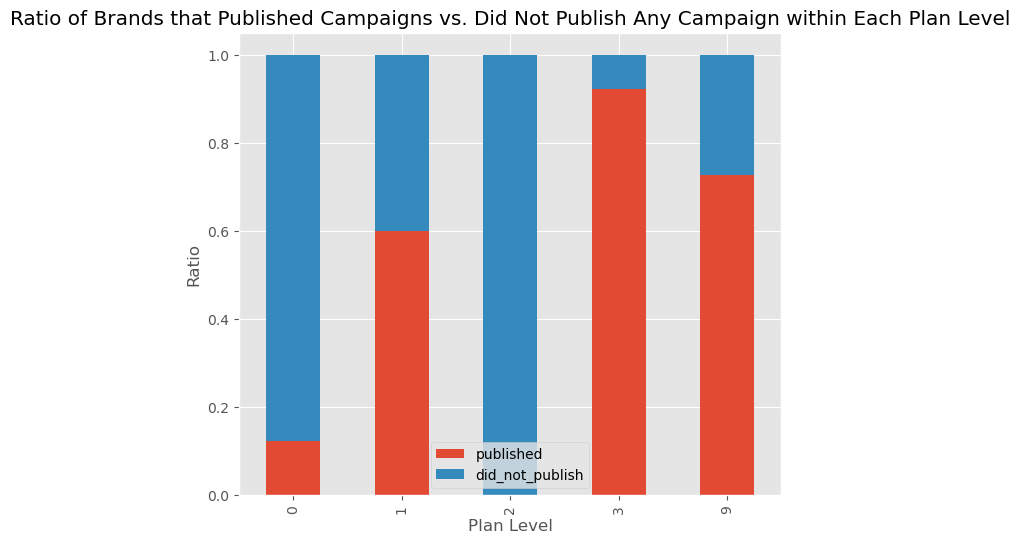

In [26]:
# Set the style of the plot
plt.style.use('ggplot')

# Create a bar plot for the ratio of brands that published campaigns vs. did not publish any campaign within each plan level
publish_ratio.plot(x='planLevel', y=['published', 'did_not_publish'], kind='bar', stacked=True, figsize=(7, 6))

# Set the title and labels of the plot
plt.title('Ratio of Brands that Published Campaigns vs. Did Not Publish Any Campaign within Each Plan Level')
plt.xlabel('Plan Level')
plt.ylabel('Ratio')

# Show the plot
plt.show()


The blue part of each bar represents the ratio of brands that have published at least one campaign, while the orange part represents the ratio of brands that haven't published any campaigns. This gives us a clear picture of the distribution of publishing behavior across different plan levels.

From the plot, we can observe the following:

- For plan level 0, most brands did not publish any campaign.
- For plan level 1, the ratio of brands that published campaigns is higher than those that did not.
- For plan level 2, all brands did not publish any campaign.
- For plan level 3, most brands published campaigns.
- For plan level 9, the ratio of brands that published campaigns is higher than those that did not.

These observations align with our earlier analysis and provide a visual confirmation of the publishing behavior across different plan levels.